[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cpuen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


“Buenas noches.
En estos días tan especiales, en los que siempre nos deben unir los mejores sentimientos, os deseo, junto a la Reina y nuestras hijas, la Princesa Leonor y la Infanta Sofía, una Feliz Navidad y que en el año 2019 podáis ver cumplidos vuestros anhelos y aspiraciones.
Hoy no quiero dejar de recordar a quienes vivís una situación difícil por razones personales, económicas o sociales; o estáis lejos de vuestro hogar y seres queridos. En estas horas, que han de ser para la alegría y de celebración, nuestro corazón y nuestro pensamiento están a vuestro lado; y nuestro mayor deseo es que todas esas circunstancias queden pronto atrás.





A lo largo de los últimos años os he venido transmitiendo en Nochebuena mis inquietudes y reflexiones sobre nuestra democracia; sobre la cohesión social y territorial, la economía y el paro o la educación; también sobre la corrupción, el terrorismo o la violencia contra las mujeres; una violencia, de tan triste actualidad y que merece siempre

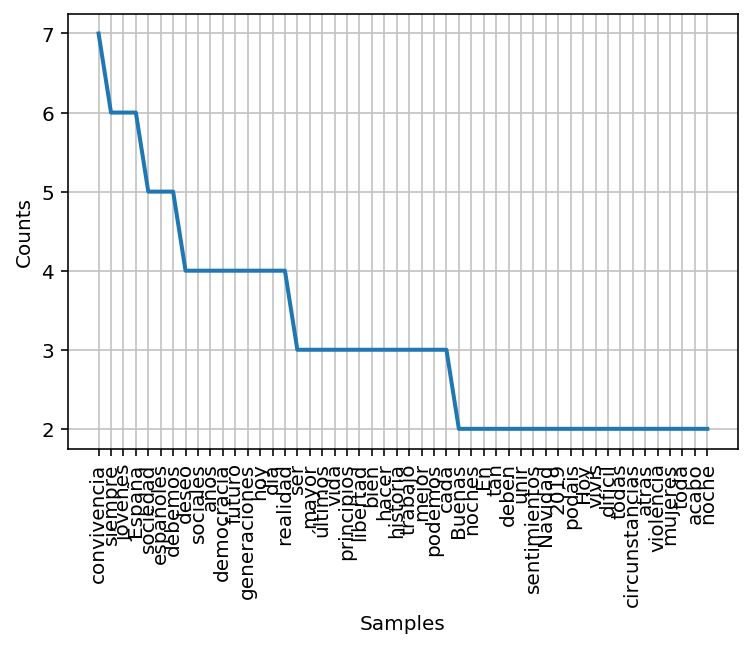

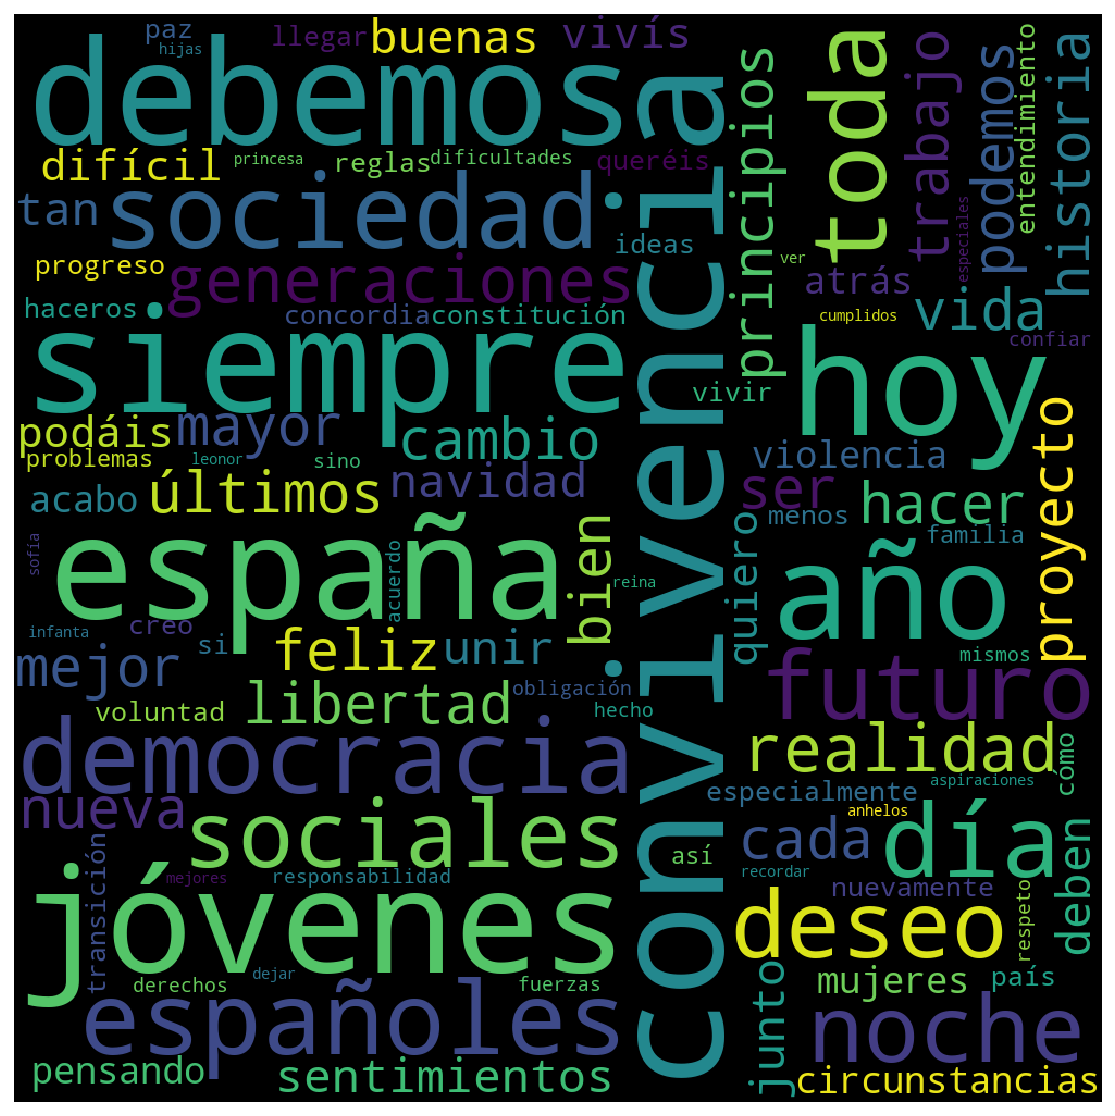

In [0]:

# coding: utf-8
# ## discurso del rey
# https://www.lavanguardia.com/politica/20181224/453750347839/discurso-rey-navidad-2018-texto-integro.html
# In[1]:

from bs4 import BeautifulSoup
import requests
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
# In[2]:
get_ipython().run_line_magic('config', "InlineBackend.figure_formats=['retina']")
#nltk.data.path.append('/Users/antuan/Documents/python/nlp/nltk_data/')
# In[3]:
pagina = requests.get("https://www.lavanguardia.com/politica/20181224/453750347839/discurso-rey-navidad-2018-texto-integro.html")
# In[4]:
soup=BeautifulSoup(pagina.content, 'html.parser')
# In[5]:
html = soup.getText()
# In[6]:
discurso = soup.find('div', 'story-leaf-txt-p').getText()
discurso_aisl = discurso[discurso.find('“'):]
# In[7]:
print(discurso_aisl)
# In[9]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens_sin_puntuacion = tokenizer.tokenize(discurso_aisl)
# In[10]:
tokens = [i for i in tokens_sin_puntuacion if (len(i)>1) and i not in stopwords.words('spanish')]
nltk.FreqDist.plot(nltk.FreqDist(tokens), 50)
# In[11]:
wc2 = wordcloud.WordCloud(
    width=1000, 
    height=1000, 
    stopwords=stopwords.words('spanish'),
    max_words=100,
    collocations=False
).generate(text=(' '.join(tokens_sin_puntuacion)).lower())
# In[12]:
get_ipython().run_line_magic('matplotlib', 'inline')
plt.figure(figsize=[10,10])
plt.imshow(wc2)
plt.axis("off");
